In [4]:
from amuse.io import read_set_from_file, write_set_to_file
from amuse.community.huayno.interface import Huayno
from amuse.units import units, nbody_system

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import glob

from HB83 import max_impact_parameter, v20_from_vinf
from initial_conditions import critical_velocity

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

#increase label size
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16

#use latex for plots
mpl.rcParams['text.usetex'] = True


/home/ybadoux/amuse-src/src/amuse/units/quantities.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  operator.__truediv__(self.number, other.number),


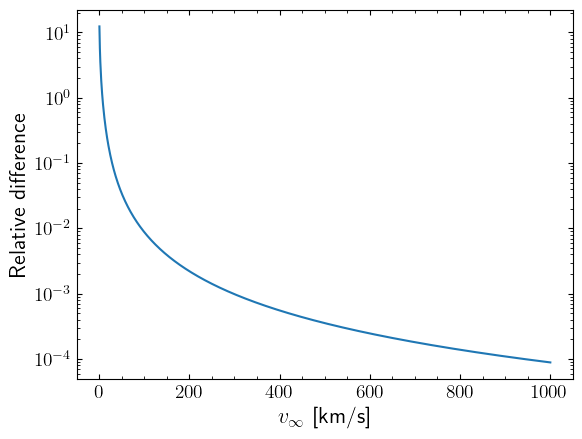

In [6]:
critical_velocities = np.linspace(0, 1000, 1000) | units.kms
v20s = v20_from_vinf(critical_velocities, a = 1|units.AU, M = 1|units.MSun)

rel_diff = []
for i in range(len(critical_velocities)):
    rel_diff.append((v20s[i] - critical_velocities[i])/critical_velocities[i])

# plt.plot([i.value_in(units.kms) for i in critical_velocities], v20s)
plt.plot([i.value_in(units.kms) for i in critical_velocities], rel_diff)
plt.xlabel(r'$v_{\infty}$ [km/s]')
plt.ylabel(r'Relative difference')
plt.yscale('log')
plt.show()

In [7]:
print(np.logspace(np.log10(1), np.log10(16), 20))

[  1.           1.15711024   1.3389041    1.54925964   1.79266419
   2.07431009   2.40020544   2.77730229   3.21364491   3.71854142
   4.30276234   4.97877036   5.76098615   6.66609605   7.71340798
   8.92526334  10.32751358  11.95007169  13.82755029  16.        ]


In [8]:
vcrit = critical_velocity(m1=1|units.MSun, m2=1|units.MSun, m3=1|units.MSun, a=1|units.AU)
print(vcrit.in_(units.kms))

36.4832729268 kms


/tmp/ipykernel_478341/2889479397.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  error = 1/np.sqrt(N[i]) * cross_section
/tmp/ipykernel_478341/2889479397.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  error = 1/np.sqrt(N[i]) * cross_section


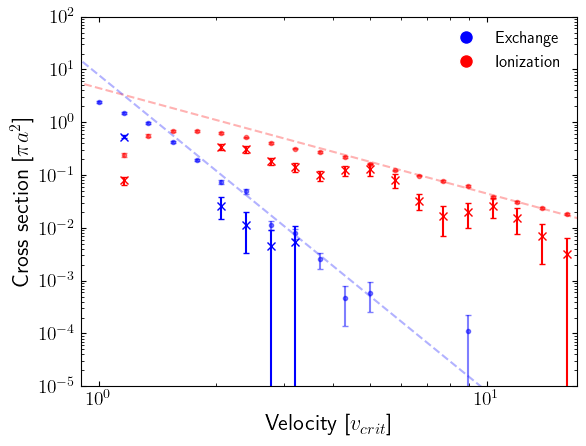

In [12]:
files = glob.glob('/home/ybadoux/Documents/MRP/HB83_test2/*.npy')
clr = ['k', 'b', 'r']
labels = ['Flyby', 'Exchange', 'Ionization']
plt.figure()
for file in files:
    results = np.load(file)
    v = file.split('_')[-1].split('.npy')[0]
    b_max = max_impact_parameter(float(v), 1.0|units.AU)

    N_tot = len(results)
    N = []
    for i in range(3):
        N.append(len(results[results['state'] == i]))
        cross_section = b_max**2 * N[i]/N_tot
        error = 1/np.sqrt(N[i]) * cross_section
        if i != 0:  
            plt.errorbar(float(v), cross_section.value_in(units.AU**2),yerr=error.value_in(units.AU**2), c=clr[i], fmt='.', capsize=2, alpha=0.5)

files = glob.glob('/home/ybadoux/Documents/MRP/acs_100/*.npy')
for file in files:
    results = np.load(file)
    v = file.split('_')[-1].split('.npy')[0]
    b_max = max_impact_parameter(float(v), 1.0|units.AU)

    N_tot = len(results)
    N = []
    for i in range(3):
        N.append(len(results[results['state'] == i]))
        cross_section = b_max**2 * N[i]/N_tot
        error = 1/np.sqrt(N[i]) * cross_section
        if i != 0:  
            plt.errorbar(float(v), cross_section.value_in(units.AU**2), yerr=error.value_in(units.AU**2), c=clr[i], fmt='x', capsize=2) 


#plot the analytical approximations
x = np.logspace(np.log10(0.1), np.log10(20), 100)
y = 40/9*np.pi*1/x**2
plt.plot(x, y/np.pi, 'r--', alpha=0.3)

y3 = 640/81*np.pi*1/x**6
plt.plot(x, y3/np.pi, 'b--', alpha=0.3)

# plt.scatter(2, cross_section_acs.value_in(units.AU**2), c='g', label='ACS test')
# plt.scatter(1.5, 3.32**2*171/10000, c='g', label='ACS test')

plt.xlabel(r'Velocity [$v_{crit}$]')
plt.ylabel(r'Cross section [$\pi a^2$]')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=labels[i], markerfacecolor=clr[i], markersize=10) for i in range(1,3)],
           fontsize=12, frameon=False)
plt.yscale('log')
plt.xscale('log')
# plt.axvline(2.4)
plt.xlim(0.9,17)
plt.ylim(1e-5,100)
plt.savefig('cross_section_equal_masses.png')
plt.show()

In [4]:
#combine all the results
all_results = np.load(files[0])
for file in files[1:]:
    all_results = np.append(all_results, np.load(file))

In [5]:
all_results = np.sort(all_results, order='v_inf')

In [ ]:
bmaxs = max_impact_parameter(all_results['v_inf'], 1.0|units.AU).value_in(units.AU)

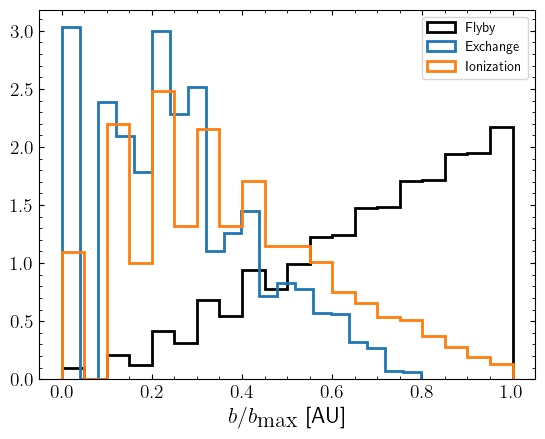

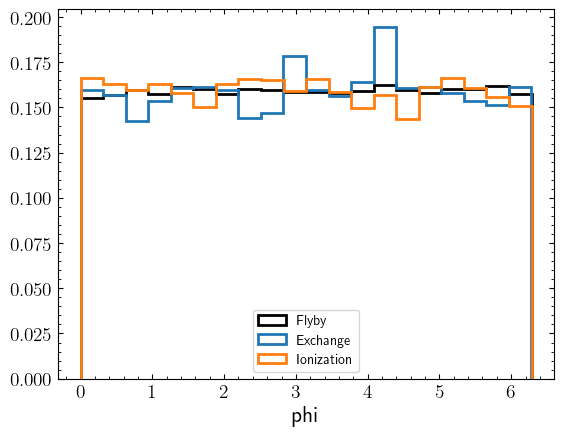

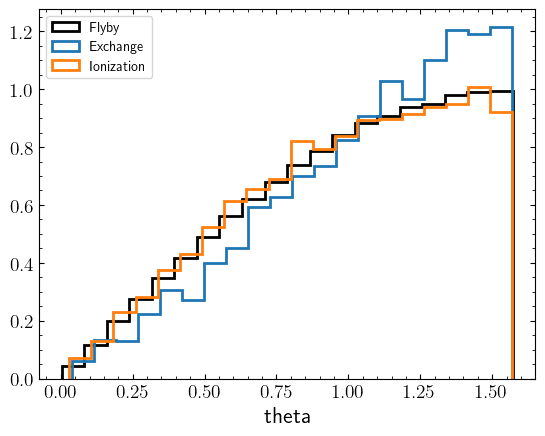

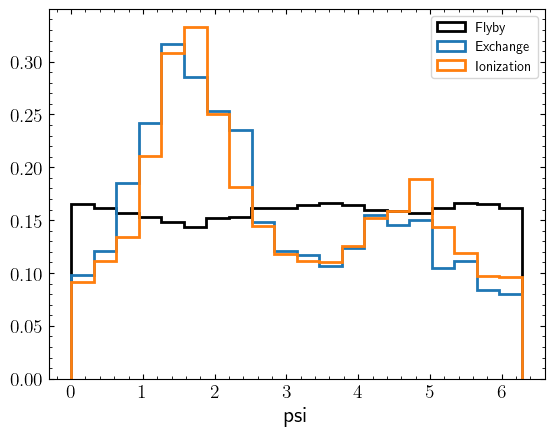

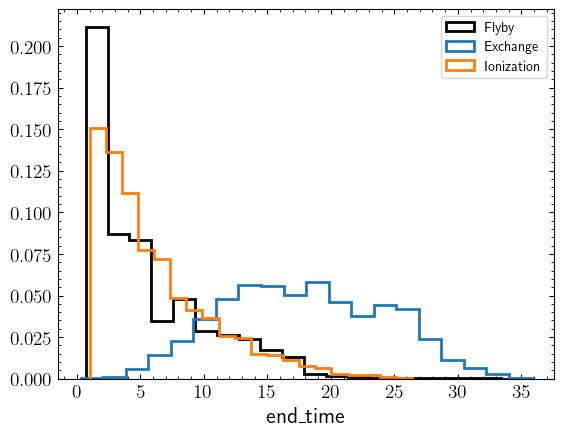

In [ ]:
for i in range(3):
    mask = all_results['state'] == i
    plt.hist(all_results[mask]['b']/bmaxs[mask], density=True, bins=20, 
             histtype='step',label=labels[i], color=clr[i], lw=2)

plt.legend()
plt.xlabel(r'$b/b_\textrm{max}$ [AU]')
plt.show()

for name in ['phi', 'theta', 'psi', 'end_time']:
    plt.figure()
    for i in range(3):
        mask = all_results['state'] == i
        plt.hist(all_results[mask][name], density=True, bins=20, 
                 histtype='step',label=labels[i], color=clr[i], lw=2)
    plt.legend()
    plt.xlabel(name)
    plt.show()